# Chebop Tutorial: Solving Differential Equations with ChebPy

This tutorial demonstrates how to use the `Chebop` class in ChebPy to solve differential equations using spectral collocation methods.

## Introduction

The `Chebop` class represents linear differential operators and allows you to:
- Define differential operators (D, D², D³, etc.)
- Combine operators algebraically (addition, multiplication, composition)
- Apply operators to chebfuns
- Solve boundary value problems (BVPs)
- Handle Dirichlet and Neumann boundary conditions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from chebpy import Chebop, chebfun

# Set up plotting
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## 1. Basic Operators

### Identity Operator

The identity operator $I$ simply returns the function unchanged: $I(f) = f$.

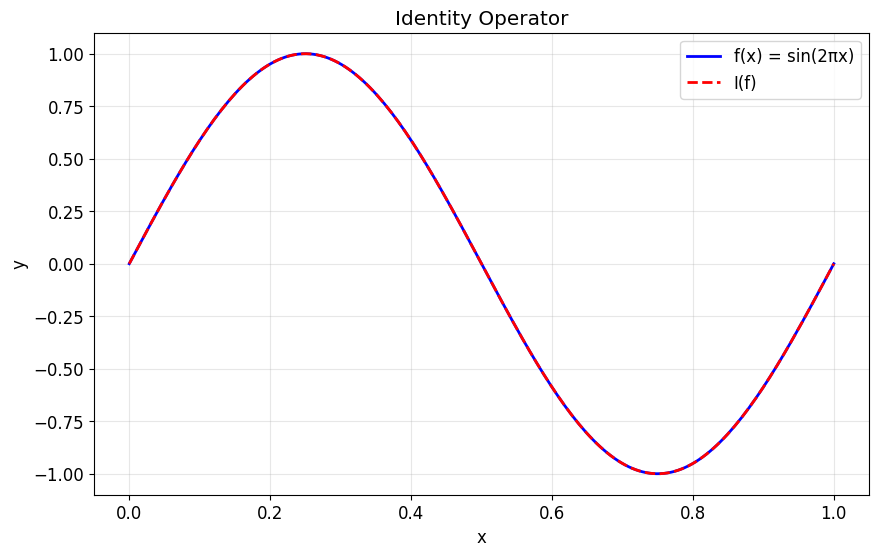

Max error: 0.00e+00


In [2]:
# Create identity operator on [0, 1]
I = Chebop.identity([0, 1])

# Apply to a function
f = chebfun(lambda x: np.sin(2*np.pi*x), [0, 1])
result = I(f)

# Plot
x = np.linspace(0, 1, 200)
plt.plot(x, f(x), 'b-', label='f(x) = sin(2πx)', linewidth=2)
plt.plot(x, result(x), 'r--', label='I(f)', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Identity Operator')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Max error: {np.max(np.abs(f(x) - result(x))):.2e}")

### Differentiation Operator

The differentiation operator $D$ computes derivatives: $D(f) = f'$.

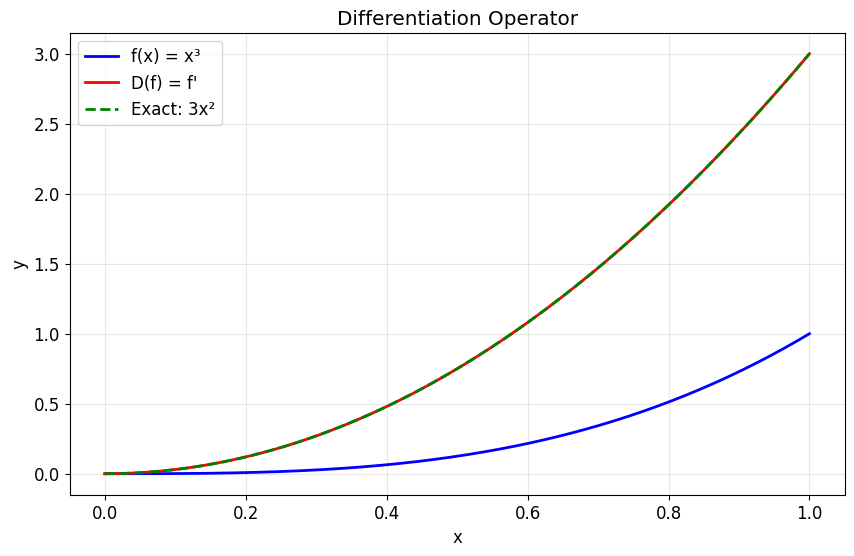

Max error: 8.88e-16


In [3]:
# Create differentiation operator
D = Chebop.diff([0, 1])

# Apply to x^3
f = chebfun(lambda x: x**3, [0, 1])
df = D(f)

# Exact derivative
df_exact = chebfun(lambda x: 3*x**2, [0, 1])

# Plot
x = np.linspace(0, 1, 200)
plt.plot(x, f(x), 'b-', label='f(x) = x³', linewidth=2)
plt.plot(x, df(x), 'r-', label="D(f) = f'", linewidth=2)
plt.plot(x, df_exact(x), 'g--', label="Exact: 3x²", linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Differentiation Operator')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Max error: {np.max(np.abs(df(x) - df_exact(x))):.2e}")

### Higher-Order Derivatives

You can create operators for higher-order derivatives:

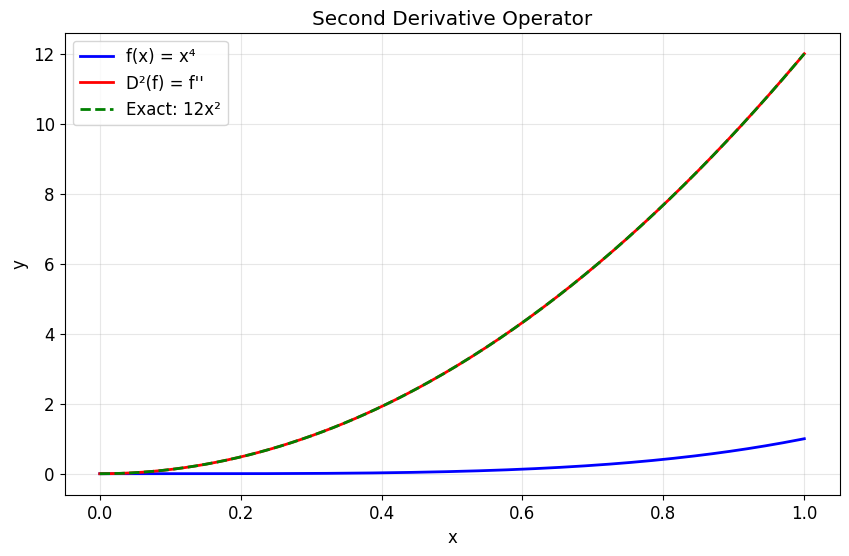

Max error: 3.55e-15


In [4]:
# Second derivative operator
D2 = Chebop.diff([0, 1], order=2)

# Apply to x^4
f = chebfun(lambda x: x**4, [0, 1])
d2f = D2(f)
d2f_exact = chebfun(lambda x: 12*x**2, [0, 1])

# Plot
x = np.linspace(0, 1, 200)
plt.plot(x, f(x), 'b-', label='f(x) = x⁴', linewidth=2)
plt.plot(x, d2f(x), 'r-', label="D²(f) = f''", linewidth=2)
plt.plot(x, d2f_exact(x), 'g--', label="Exact: 12x²", linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Second Derivative Operator')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Max error: {np.max(np.abs(d2f(x) - d2f_exact(x))):.2e}")

## 2. Operator Algebra

### Adding Operators

You can add operators to create compound operators:

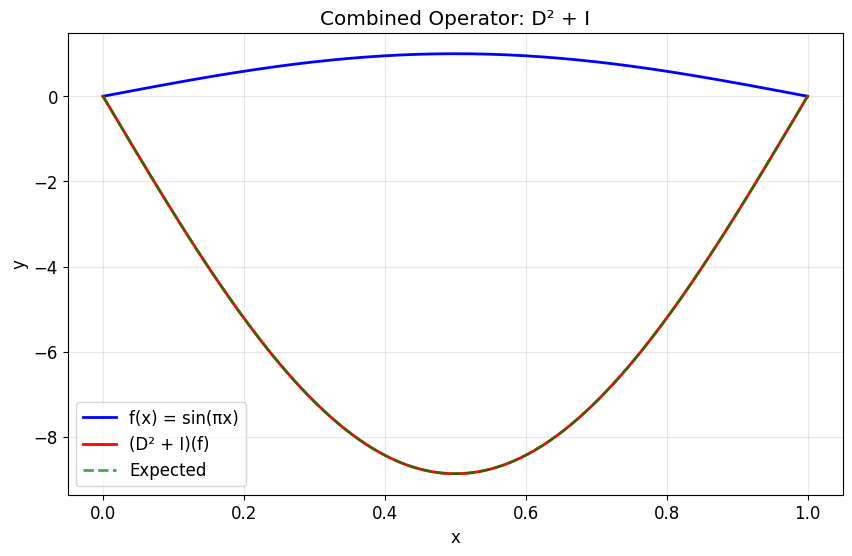

Max error: 1.96e-12


In [5]:
# Create L = D² + I (Helmholtz-type operator)
D2 = Chebop.diff([0, 1], order=2)
I = Chebop.identity([0, 1])
L = D2 + I

# Apply to sin(πx)
f = chebfun(lambda x: np.sin(np.pi*x), [0, 1])
Lf = L(f)

# Expected: f'' + f = -π²sin(πx) + sin(πx) = (1-π²)sin(πx)
expected = chebfun(lambda x: (1 - np.pi**2) * np.sin(np.pi*x), [0, 1])

# Plot
x = np.linspace(0, 1, 200)
plt.plot(x, f(x), 'b-', label='f(x) = sin(πx)', linewidth=2)
plt.plot(x, Lf(x), 'r-', label='(D² + I)(f)', linewidth=2)
plt.plot(x, expected(x), 'g--', label='Expected', linewidth=2, alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Combined Operator: D² + I')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Max error: {np.max(np.abs(Lf(x) - expected(x))):.2e}")

### Multiplying by Scalars

Operators can be scaled by constants:

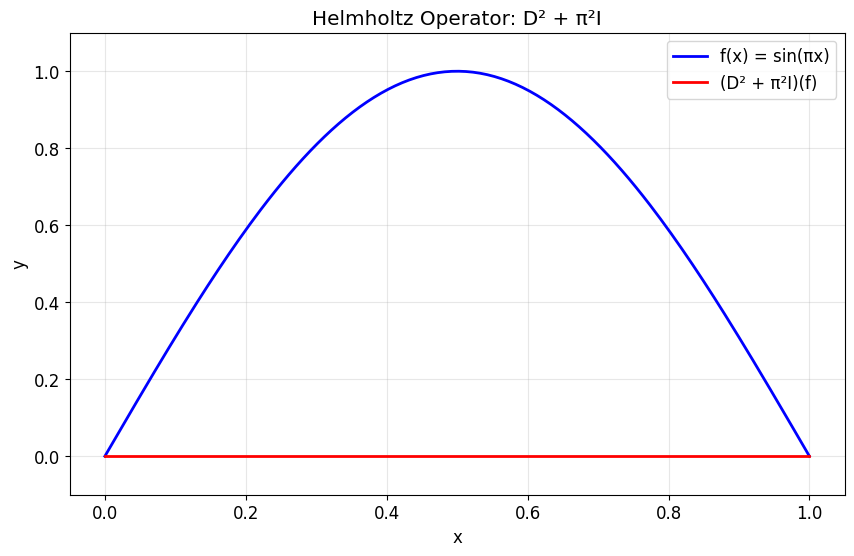

Max value of (D² + π²I)(sin(πx)): 1.96e-12


In [6]:
# Create L = D² + π²I
L = D2 + np.pi**2 * I

# Apply to sin(πx)
f = chebfun(lambda x: np.sin(np.pi*x), [0, 1])
Lf = L(f)

# Expected: f'' + π²f = -π²sin(πx) + π²sin(πx) = 0
x = np.linspace(0, 1, 200)
plt.plot(x, f(x), 'b-', label='f(x) = sin(πx)', linewidth=2)
plt.plot(x, Lf(x), 'r-', label='(D² + π²I)(f)', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Helmholtz Operator: D² + π²I')
plt.grid(True, alpha=0.3)
plt.ylim([-0.1, 1.1])
plt.show()

print(f"Max value of (D² + π²I)(sin(πx)): {np.max(np.abs(Lf(x))):.2e}")

### Multiplication Operators

You can create operators that multiply by a function:

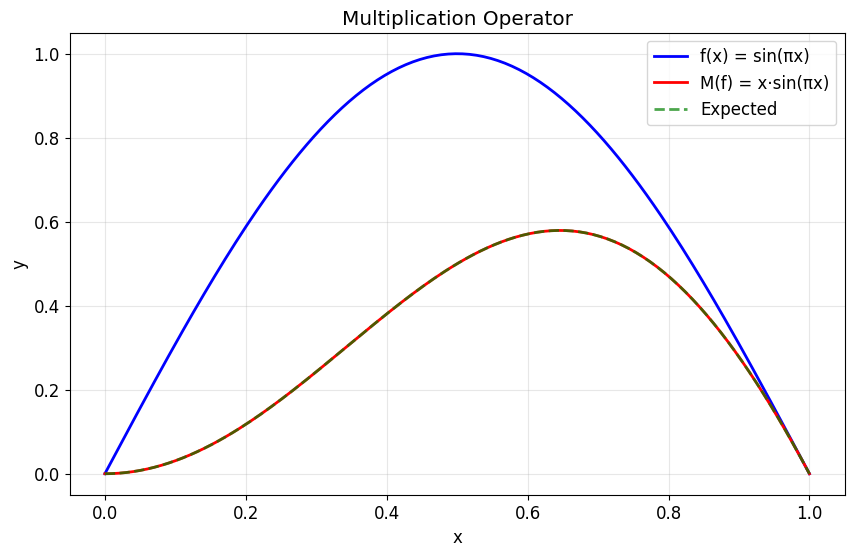

Max error: 2.22e-16


In [7]:
# Create multiplication operator
x_fun = chebfun(lambda x: x, [0, 1])
M = Chebop.diag(x_fun)

# Multiply sin(πx) by x
f = chebfun(lambda x: np.sin(np.pi*x), [0, 1])
Mf = M(f)

# Expected: x*sin(πx)
expected = chebfun(lambda x: x * np.sin(np.pi*x), [0, 1])

# Plot
x = np.linspace(0, 1, 200)
plt.plot(x, f(x), 'b-', label='f(x) = sin(πx)', linewidth=2)
plt.plot(x, Mf(x), 'r-', label='M(f) = x·sin(πx)', linewidth=2)
plt.plot(x, expected(x), 'g--', label='Expected', linewidth=2, alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Multiplication Operator')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Max error: {np.max(np.abs(Mf(x) - expected(x))):.2e}")

## 3. Solving Boundary Value Problems

### Example 1: Simple Poisson Equation

Solve: $u'' = f(x)$ with $u(0) = u(1) = 0$

Let's solve $u'' = -\pi^2 \sin(\pi x)$ with zero Dirichlet boundary conditions.

The exact solution is $u(x) = \sin(\pi x)$.

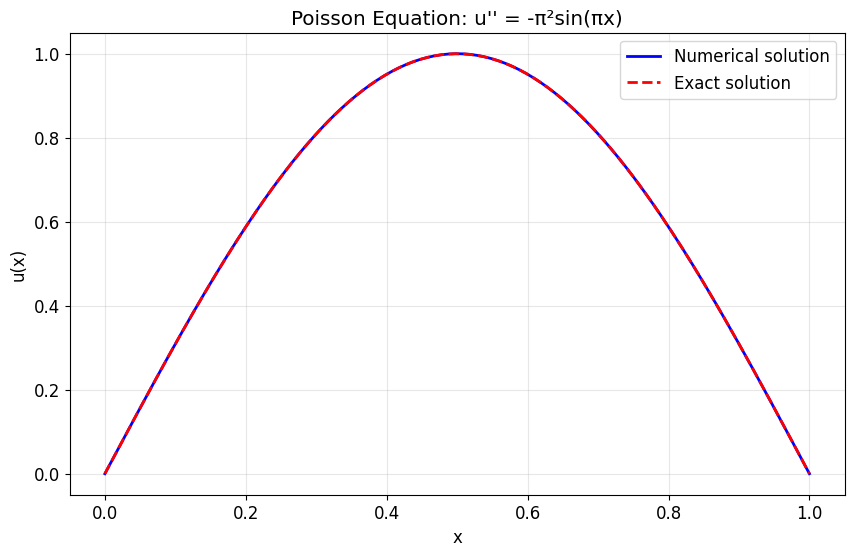

Max error: 1.02e-14


In [13]:
# Define operator
D2 = Chebop.diff([0, 1], order=2)
D2.lbc = 0  # u(0) = 0
D2.rbc = 0  # u(1) = 0

# Right-hand side
f = chebfun(lambda x: -np.pi**2 * np.sin(np.pi*x), [0, 1])

# Solve
u = D2.solve(f)

# Exact solution
u_exact = chebfun(lambda x: np.sin(np.pi*x), [0, 1])

# Plot
x = np.linspace(0, 1, 200)
plt.plot(x, u(x), 'b-', label='Numerical solution', linewidth=2)
plt.plot(x, u_exact(x), 'r--', label='Exact solution', linewidth=2)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title("Poisson Equation: u'' = -π²sin(πx)")
plt.grid(True, alpha=0.3)
plt.show()

error = np.max(np.abs(u(x) - u_exact(x)))
print(f"Max error: {error:.2e}")

### Example 2: Helmholtz Equation

Solve: $u'' - u = f(x)$ with $u(0) = u(1) = 0$

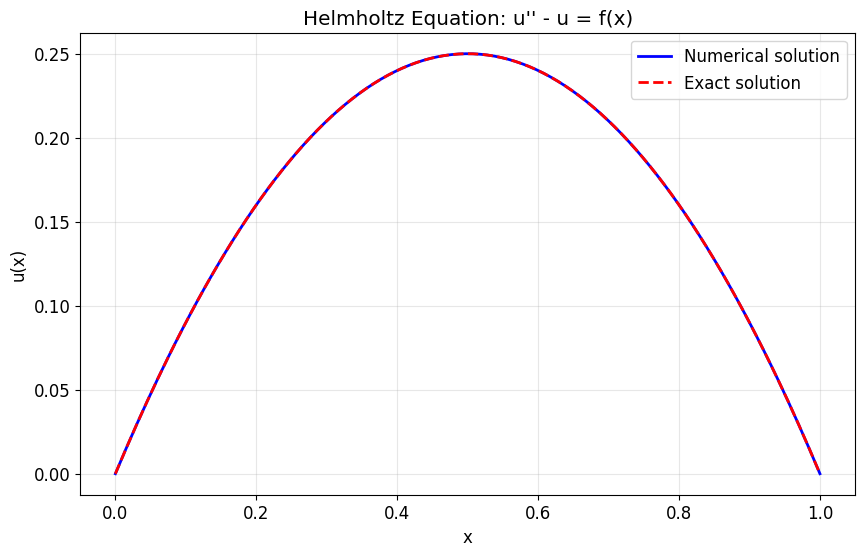

Max error: 1.22e-15


In [15]:
# Define operator: L = D² - I
D2 = Chebop.diff([0, 1], order=2)
I = Chebop.identity([0, 1])
L = D2 - I
L.lbc = 0
L.rbc = 0

# Use RHS such that u = x(1-x) is the solution
# u'' - u = -2 - x(1-x)
f = chebfun(lambda x: -2 - x + x**2, [0, 1])

# Solve
u = L.solve(f)

# Exact solution
u_exact = chebfun(lambda x: x * (1 - x), [0, 1])

# Plot
x = np.linspace(0, 1, 200)
plt.plot(x, u(x), 'b-', label='Numerical solution', linewidth=2)
plt.plot(x, u_exact(x), 'r--', label='Exact solution', linewidth=2)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title("Helmholtz Equation: u'' - u = f(x)")
plt.grid(True, alpha=0.3)
plt.show()

error = np.max(np.abs(u(x) - u_exact(x)))
print(f"Max error: {error:.2e}")

### Example 3: Neumann Boundary Conditions

Solve: $u'' = 2$ with $u'(0) = 0, u(1) = 0$

The exact solution is $u(x) = x^2 - 1$.

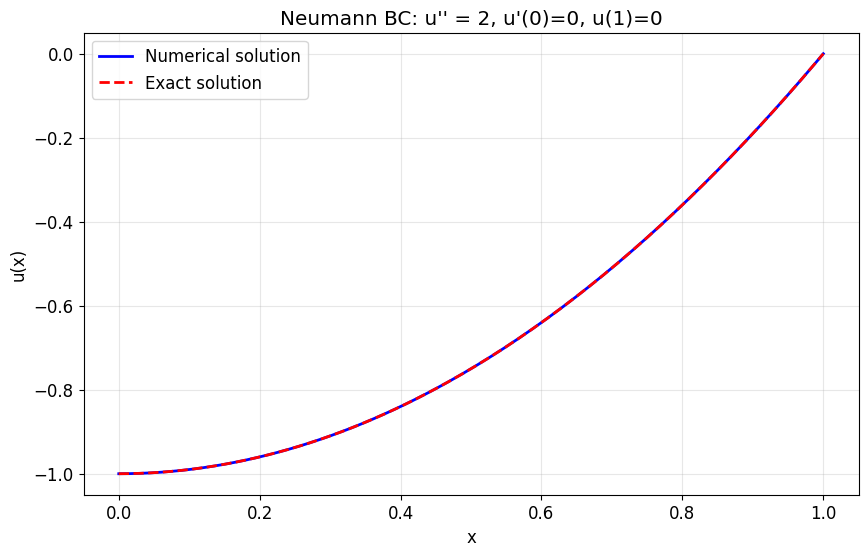

Max error: 3.30e-13
u'(0) = 6.17e-15 (should be 0)
u(1) = 1.11e-16 (should be 0)


In [16]:
# Define operator
D2 = Chebop.diff([0, 1], order=2)
D2.lbc = 'neumann'  # u'(0) = 0
D2.rbc = 0           # u(1) = 0 (Dirichlet)

# Right-hand side
f = chebfun(lambda x: 2 + 0*x, [0, 1])

# Solve
u = D2.solve(f)

# Exact solution
u_exact = chebfun(lambda x: x**2 - 1, [0, 1])

# Plot
x = np.linspace(0, 1, 200)
plt.plot(x, u(x), 'b-', label='Numerical solution', linewidth=2)
plt.plot(x, u_exact(x), 'r--', label='Exact solution', linewidth=2)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title("Neumann BC: u'' = 2, u'(0)=0, u(1)=0")
plt.grid(True, alpha=0.3)
plt.show()

error = np.max(np.abs(u(x) - u_exact(x)))
print(f"Max error: {error:.2e}")

# Verify boundary conditions
u_prime = u.diff()
print(f"u'(0) = {u_prime(0):.2e} (should be 0)")
print(f"u(1) = {u(1):.2e} (should be 0)")

### Example 4: Mixed Boundary Conditions

Solve: $u'' = 2$ with $u(0) = 0, u'(1) = 0$

The exact solution is $u(x) = x^2 - 2x$.

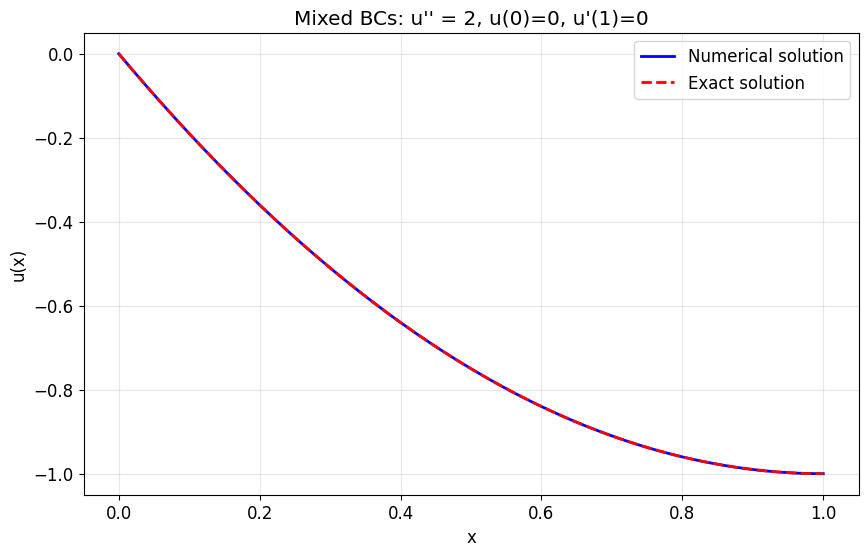

Max error: 1.28e-13
u(0) = -2.78e-17 (should be 0)
u'(1) = -2.20e-13 (should be 0)


In [ ]:
# Define operator
D2 = Chebop.diff([0, 1], order=2)
D2.lbc = 0           # u(0) = 0 (Dirichlet)
D2.rbc = 'neumann'   # u'(1) = 0

# Right-hand side
f = chebfun(lambda x: 2 + 0*x, [0, 1]) # TODO: Should be able to do 2 alone?

# Solve
u = D2.solve(f)

# Exact solution
u_exact = chebfun(lambda x: x**2 - 2*x, [0, 1])

# Plot
x = np.linspace(0, 1, 200)
plt.plot(x, u(x), 'b-', label='Numerical solution', linewidth=2)
plt.plot(x, u_exact(x), 'r--', label='Exact solution', linewidth=2)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title("Mixed BCs: u'' = 2, u(0)=0, u'(1)=0")
plt.grid(True, alpha=0.3)
plt.show()

error = np.max(np.abs(u(x) - u_exact(x)))
print(f"Max error: {error:.2e}")

# Verify boundary conditions
u_prime = u.diff()
print(f"u(0) = {u(0):.2e} (should be 0)")
print(f"u'(1) = {u_prime(1):.2e} (should be 0)")

## 4. Different Domains

Chebop can work on arbitrary domains, not just [0,1].

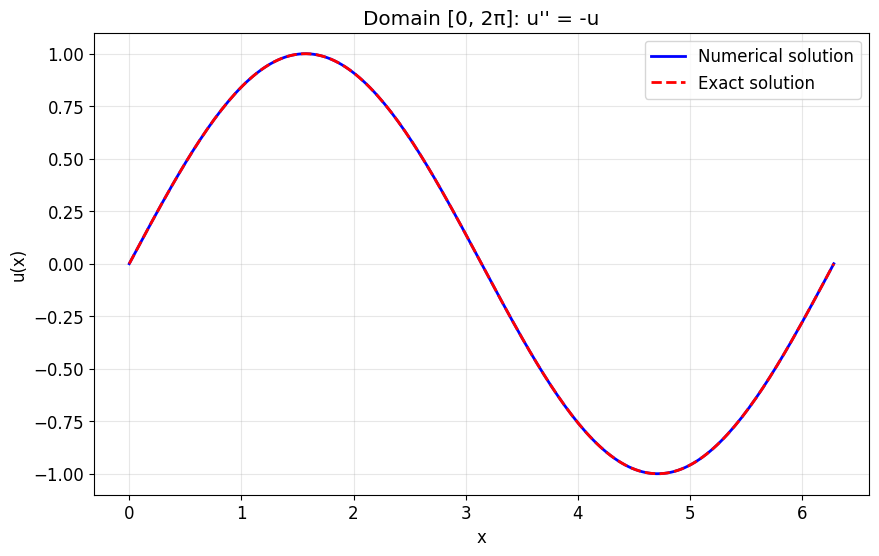

Max error: 9.55e-15


In [19]:
# Solve on [0, 2π]
D2 = Chebop.diff([0, 2*np.pi], order=2)
D2.lbc = 0
D2.rbc = 0

# Solve u'' = -u with u(0) = u(2π) = 0
# Exact solution: u = sin(x)
f = chebfun(lambda x: -np.sin(x), [0, 2*np.pi])
u = D2.solve(f)

u_exact = chebfun(lambda x: np.sin(x), [0, 2*np.pi])

# Plot
x = np.linspace(0, 2*np.pi, 200)
plt.plot(x, u(x), 'b-', label='Numerical solution', linewidth=2)
plt.plot(x, u_exact(x), 'r--', label='Exact solution', linewidth=2)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title("Domain [0, 2π]: u'' = -u")
plt.grid(True, alpha=0.3)
plt.show()

error = np.max(np.abs(u(x) - u_exact(x)))
print(f"Max error: {error:.2e}")

## Summary

This tutorial file shows how to:

1. **Create basic operators**: Identity (I), differentiation (D, D², D³)
2. **Combine operators**: Addition, scalar multiplication, composition
3. **Apply operators to functions**: Forward mode evaluation
4. **Solve BVPs**: Dirichlet and Neumann boundary conditions
5. **Work with different domains**: Not just [0, 1]